# PANDAS: series

In [1]:
import numpy as np
import pandas as pd

In [32]:
etiquetas = ['a','b','c']
datos = [1,2,3]
pd.Series(data = datos, index = etiquetas)

a    1
b    2
c    3
dtype: int64

In [3]:
array = np.arange(0,3)
pd.Series(array)

0    0
1    1
2    2
dtype: int64

In [4]:
serie1 = pd.Series([1,2,3],['a','b','c'])
serie2 = pd.Series([6,5,4],['a','b','c'])

In [5]:
serie1,serie2

(a    1
 b    2
 c    3
 dtype: int64,
 a    6
 b    5
 c    4
 dtype: int64)

In [6]:
serie1 + serie2

a    7
b    7
c    7
dtype: int64

# PANDAS: dataframes

In [33]:
filas = ['a','b','c']
columnas = ['x','y','z']
datos = [[1,2,3],[4,5,6],[7,8,9]]
dataframe = pd.DataFrame(datos,filas,columnas)
dataframe

,x,y,z
a,1,2,3
b,4,5,6
c,7,8,9


In [34]:
dataframe.loc[['b']]

,x,y,z
b,4,5,6


In [35]:
dataframe[['z']]

,z
a,3
b,6
c,9


In [36]:
dataframe.loc['a']['z']

3

In [37]:
dataframe.shape

(3, 3)

In [45]:
dataframe['totales'] = dataframe['x'] + dataframe['y'] + dataframe['z']
dataframe['calculados'] = dataframe.loc['a'] + dataframe.loc['b'] + dataframe.loc['c']
dataframe.loc['calculados'] = dataframe.loc['a'] + dataframe.loc['b'] + dataframe.loc['c']

In [46]:
dataframe

,x,y,z,totales,calculados
a,1,2,3,6,NaN
b,4,5,6,15,NaN
c,7,8,9,24,NaN
calculados,12,15,18,45,NaN


In [47]:
dataframe.drop('calculados',axis=1)

,x,y,z,totales
a,1,2,3,6
b,4,5,6,15
c,7,8,9,24
calculados,12,15,18,45


In [48]:
dataframe

,x,y,z,totales,calculados
a,1,2,3,6,NaN
b,4,5,6,15,NaN
c,7,8,9,24,NaN
calculados,12,15,18,45,NaN


In [49]:
dataframe.drop('calculados',axis=1,inplace=True)
dataframe

,x,y,z,totales
a,1,2,3,6
b,4,5,6,15
c,7,8,9,24
calculados,12,15,18,45


In [50]:
dataframe.shape

(4, 4)

# PANDAS: Selección de datos con una condición

In [51]:
filas = 'v1 v2 v3 v4'.split ()
filas

['v1', 'v2', 'v3', 'v4']

In [52]:
cols = 'z1 z2 z3 z4'.split ()
cols

['z1', 'z2', 'z3', 'z4']

In [54]:
datos = [[12,34,56,5534],[43,66,778,0],[334,66,222,444],[3324,3434,323,3412]]

In [56]:
dataframe = pd.DataFrame(datos,filas,cols)

In [57]:
dataframe

,z1,z2,z3,z4
v1,12,34,56,5534
v2,43,66,778,0
v3,334,66,222,444
v4,3324,3434,323,3412


In [58]:
condicion = dataframe > 200
dataframe[condicion]

,z1,z2,z3,z4
v1,NaN,NaN,NaN,5534.0
v2,NaN,NaN,778.0,NaN
v3,334.0,NaN,222.0,444.0
v4,3324.0,3434.0,323.0,3412.0


In [59]:
condicion = dataframe['z2'] > 200
dataframe[condicion]

,z1,z2,z3,z4
v4,3324,3434,323,3412


In [70]:
condicion = (dataframe['z2'] > 50) & (dataframe['z4'] > 100)
dataframe[condicion]

,z1,z2,z3,z4
v3,334,66,222,444
v4,3324,3434,323,3412


In [72]:
dataframe[condicion][['z1','z3']]

,z1,z3
v3,334,222
v4,3324,323


In [73]:
dataframe

,z1,z2,z3,z4
v1,12,34,56,5534
v2,43,66,778,0
v3,334,66,222,444
v4,3324,3434,323,3412


In [76]:
nuevas = 'd1 d2 d3 d4'.split()
dataframe['dias'] = nuevas

In [77]:
dataframe

,z1,z2,z3,z4,dias
v1,12,34,56,5534,d1
v2,43,66,778,0,d2
v3,334,66,222,444,d3
v4,3324,3434,323,3412,d4


In [78]:
dataframe.set_index('dias')

,z1,z2,z3,z4
dias,,,,
d1,12,34,56,5534
d2,43,66,778,0
d3,334,66,222,444
d4,3324,3434,323,3412


In [79]:
dataframe

,z1,z2,z3,z4,dias
v1,12,34,56,5534,d1
v2,43,66,778,0,d2
v3,334,66,222,444,d3
v4,3324,3434,323,3412,d4


In [80]:
dataframe = dataframe.set_index('dias')

In [81]:
dataframe

,z1,z2,z3,z4
dias,,,,
d1,12,34,56,5534
d2,43,66,778,0
d3,334,66,222,444
d4,3324,3434,323,3412


# PANDAS: Tratamiento nulos

In [82]:
dic = {'a':[4,5,np.nan], 'b':[6,1,5], 'c':[np.nan, 4, np.nan]}

In [83]:
dataframe = pd.DataFrame(dic)

In [84]:
dataframe

,a,b,c
0,4.0,6,NaN
1,5.0,1,4.0
2,NaN,5,NaN


In [85]:
dataframe.dropna()

,a,b,c
1,5.0,1,4.0


In [86]:
dataframe.fillna(value=50)

,a,b,c
0,4.0,6,50.0
1,5.0,1,4.0
2,50.0,5,50.0


In [88]:
valor_medio = dataframe.mean()
valor_medio

a    4.5
b    4.0
c    4.0
dtype: float64

In [89]:
dataframe.fillna(value=valor_medio)

,a,b,c
0,4.0,6,4.0
1,5.0,1,4.0
2,4.5,5,4.0


# PANDAS: Agrupación, Merge, Join y Operaciones

In [95]:
dataframe.groupby('a').mean ()

,b,c
a,,
4.0,6.0,NaN
5.0,1.0,4.0


In [98]:
dataframe.groupby('c').sum()

,a,b
c,,
4.0,5.0,1


In [99]:
dataframe.groupby('a').describe()

b                                       c                          \
    count mean std  min  25%  50%  75%  max count mean std  min  25%  50%   
a                                                                           
4.0   1.0  6.0 NaN  6.0  6.0  6.0  6.0  6.0   0.0  NaN NaN  NaN  NaN  NaN   
5.0   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   1.0  4.0 NaN  4.0  4.0  4.0   

               
     75%  max  
a              
4.0  NaN  NaN  
5.0  4.0  4.0

In [100]:
dataframe.describe()

,a,b,c
count,2.000000,3.000000,1.0
mean,4.500000,4.000000,4.0
std,0.707107,2.645751,NaN
min,4.000000,1.000000,4.0
25%,4.250000,3.000000,4.0
50%,4.500000,5.000000,4.0
75%,4.750000,5.500000,4.0
max,5.000000,6.000000,4.0


In [101]:
dic1 = {'a':[4,5,5], 'b':[6,1,5], 'c':[3, 4, 8]}

In [117]:
dic2 = {'a':[0,0,0] ,'r':[4,5,5], 't':[6,1,5], 'p':[3, 4, 8]}

In [118]:
df1 = pd.DataFrame(dic1)
df1

,a,b,c
0,4,6,3
1,5,1,4
2,5,5,8


In [119]:
df2 = pd.DataFrame(dic2)
df2

,a,r,t,p
0,0,4,6,3
1,0,5,1,4
2,0,5,5,8


In [120]:
pd.concat([df1,df2], axis=1)

,a,b,c,a,r,t,p
0,4,6,3,0,4,6,3
1,5,1,4,0,5,1,4
2,5,5,8,0,5,5,8


In [121]:
df_agrupado = pd.concat([df1,df2], axis=1)

In [122]:
df_agrupado

,a,b,c,a,r,t,p
0,4,6,3,0,4,6,3
1,5,1,4,0,5,1,4
2,5,5,8,0,5,5,8


In [124]:
df_merge = pd.merge(df1,df2,on='a')
df_merge

,a,b,c,r,t,p


In [130]:
df3 = pd.DataFrame(dic1, index =['i1','i2','i3'])
df3


,a,b,c
i1,4,6,3
i2,5,1,4
i3,5,5,8


In [134]:
dic2 = {'s':[0,0,0] ,'r':[4,5,5], 't':[6,1,5], 'p':[3, 4, 8]}
df4 = pd.DataFrame(dic2, index =['i1','i2','i3'])
df4

,s,r,t,p
i1,0,4,6,3
i2,0,5,1,4
i3,0,5,5,8


In [137]:
df_join = df3.join(df4)
df_join

,a,b,c,s,r,t,p
i1,4,6,3,0,4,6,3
i2,5,1,4,0,5,1,4
i3,5,5,8,0,5,5,8


In [138]:
df_join['a'].unique()

array([4, 5])

In [141]:

df_join['r'].apply(lambda x: x*2)

i1     8
i2    10
i3    10
Name: r, dtype: int64

In [142]:
df_join.drop('i1')

,a,b,c,s,r,t,p
i2,5,1,4,0,5,1,4
i3,5,5,8,0,5,5,8


In [143]:
df_join.drop('c',axis=1)

,a,b,s,r,t,p
i1,4,6,0,4,6,3
i2,5,1,0,5,1,4
i3,5,5,0,5,5,8


In [144]:
df_join.columns

Index(['a', 'b', 'c', 's', 'r', 't', 'p'], dtype='object')

In [145]:
df_join.index

Index(['i1', 'i2', 'i3'], dtype='object')

In [146]:
df_join.describe

<bound method NDFrame.describe of     a  b  c  s  r  t  p
i1  4  6  3  0  4  6  3
i2  5  1  4  0  5  1  4
i3  5  5  8  0  5  5  8>

In [147]:
df_join.sort_values('b')

,a,b,c,s,r,t,p
i2,5,1,4,0,5,1,4
i3,5,5,8,0,5,5,8
i1,4,6,3,0,4,6,3


# PANDAS: excel

In [148]:
pwd

'/Users/danielcontrerasaladro'

In [149]:
ls

Applications/                 PycharmProjects/
Desktop/                      Sites/
Documentos/                   Untitled1.ipynb
Documents/                    anaconda3/
Downloads/                    dca.code-profile
Electron.code-workspace       default-soapui-workspace.xml
Favorite/                     eclipse/
Library/                      iSkysoft/
Movies/                       macShortKey
Music/                        old.bashrc*
NUMPY.ipynb                   temp/
PANDAS.ipynb                  templates/
Pictures/                     tmp/
Postman/                      workspace.code-workspace
Postman Agent/                ?Library/
Public/


python(99456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [150]:
ls /Users/danielcontrerasaladro/Documents/Kairos/Cursos/ML/

Ejemplo_excel.xlsx  NUMPY.ipynb         leccion53.py
MLTests.ipynb       leccion53.ipynb


python(99902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [159]:
df_excel = pd.read_excel('/Users/danielcontrerasaladro/Documents/Kairos/Cursos/ML/Ejemplo_excel.xlsx')

In [160]:
df_excel

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [161]:
df_excel['e'] = [4,11,15,19]

In [162]:
df_excel

,Unnamed: 0,a,b,c,d,e
0,0,0,1,2,3,4
1,1,4,5,6,7,11
2,2,8,9,10,11,15
3,3,12,13,14,15,19


In [165]:
df_excel.to_csv('/Users/danielcontrerasaladro/Documents/Kairos/Cursos/ML/salida.csv')

# PANDAS: Leer HTML

In [166]:
pagina = 'https://es.wikipedia.org/wiki/Reina_Roja_(serie_de_televisi%C3%B3n)'

In [167]:
datos = pd.read_html(pagina)

In [168]:
type(datos)

list

In [169]:
datos

[                       Reina Roja  \
 0             Serie de televisión   
 1                          Género   
 2                       Basado en   
 3                     Escrito por   
 4                    Dirigido por   
 5                   Protagonistas   
 6                  País de origen   
 7          Idioma(s) original(es)   
 8                      Producción   
 9      Productor(es) ejecutivo(s)   
 10                 Cinematografía   
 11       Empresa(s) productora(s)   
 12                    Lanzamiento   
 13              Medio de difusión   
 14           Fecha de lanzamiento   
 15               Enlaces externos   
 16          Ficha en FilmAffinity   
 17  Ver todos los créditos (IMDb)   
 18                  Ficha en IMDb   
 19     [editar datos en Wikidata]   
 
                                          Reina Roja.1  \
 0                                 Serie de televisión   
 1                                            Thriller   
 2                     Rei

In [170]:
datos[0]

,Reina Roja,Reina Roja.1,Reina Roja.2
0,Serie de televisión,Serie de televisión,Serie de televisión
1,Género,Thriller,Thriller
2,Basado en,Reina Roja de Juan Gómez-Jurado,Reina Roja de Juan Gómez-Jurado
3,Escrito por,Amaya Muruzábal Salvador Perpiñá,Amaya Muruzábal Salvador Perpiñá
4,Dirigido por,Koldo Serra Julián de Tavira,Koldo Serra Julián de Tavira
5,Protagonistas,Vicky Luengo Hovik Keuchkerian Andrea Trepat C...,Vicky Luengo Hovik Keuchkerian Andrea Trepat C...
6,País de origen,España,España
7,Idioma(s) original(es),Español,Español
8,Producción,Producción,Producción
9,Productor(es) ejecutivo(s),Amaya Muruzábal Juan Gómez-Jurado Sergio Díaz ...,Amaya Muruzábal Juan Gómez-Jurado Sergio Díaz ...


In [171]:
df_html = datos[0]

In [172]:
df_html.head(3)

,Reina Roja,Reina Roja.1,Reina Roja.2
0,Serie de televisión,Serie de televisión,Serie de televisión
1,Género,Thriller,Thriller
2,Basado en,Reina Roja de Juan Gómez-Jurado,Reina Roja de Juan Gómez-Jurado


# Pandas: SQL

pip install sqlalchemy

In [173]:
from sqlalchemy import create_engine

In [174]:
dic_sql = {'A':[1,2,3],'B':[4,5,6]}
df_sql = pd.DataFrame(dic_sql)

In [175]:
df_sql

,A,B
0,1,4
1,2,5
2,3,6


In [176]:
engine = create_engine('sqlite:///:memory:')

In [177]:
df_sql.to_sql('tabla', engine, index=False)

3

In [178]:
dbdata = pd.read_sql('tabla', con=engine)

In [179]:
dbdata

,A,B
0,1,4
1,2,5
2,3,6


# Pandas: Gráficos

In [182]:
dfg = pd.DataFrame(np.random.randint(200,size=(50,4)), columns='a b c d'.split())

In [183]:
dfg

,a,b,c,d
0,58,192,57,105
1,119,89,181,119
2,56,25,36,147
3,64,110,171,67
4,99,23,161,108
5,59,162,102,0
6,153,72,95,6
7,157,3,46,36
8,63,192,143,180
9,189,38,5,93


<Axes: >

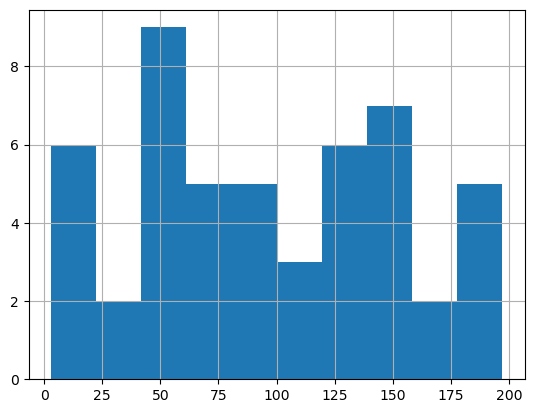

In [184]:
dfg['a'].hist()

<Axes: >

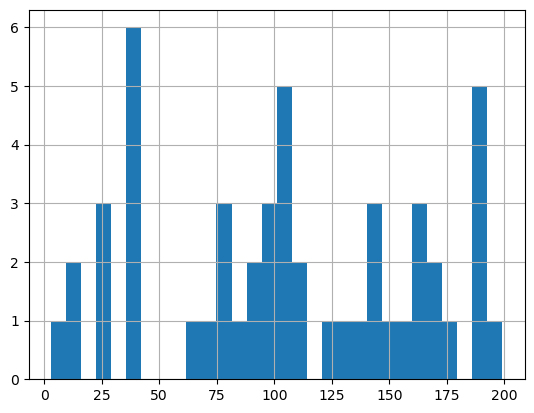

In [186]:
dfg['b'].hist(bins=30)

<Axes: ylabel='Frequency'>

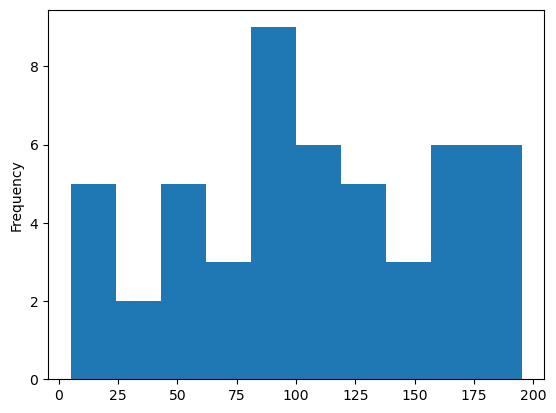

In [187]:
dfg['c'].plot.hist()

<Axes: >

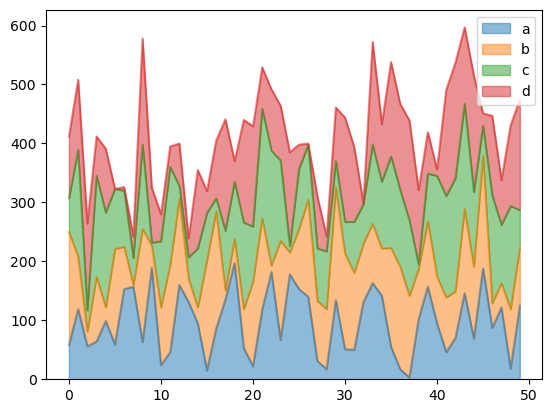

In [189]:
dfg.plot.area(alpha=0.5)

<Axes: >

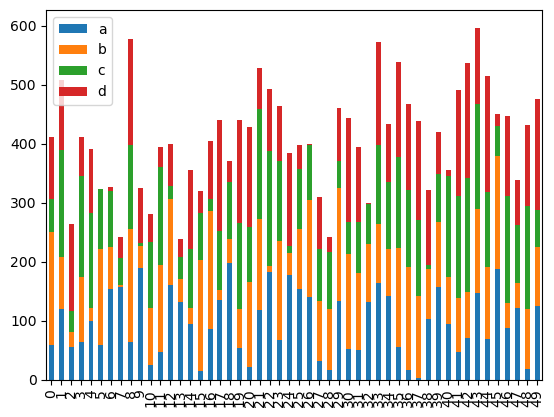

In [191]:
dfg.plot.bar(stacked=True)

<Axes: xlabel='a', ylabel='b'>

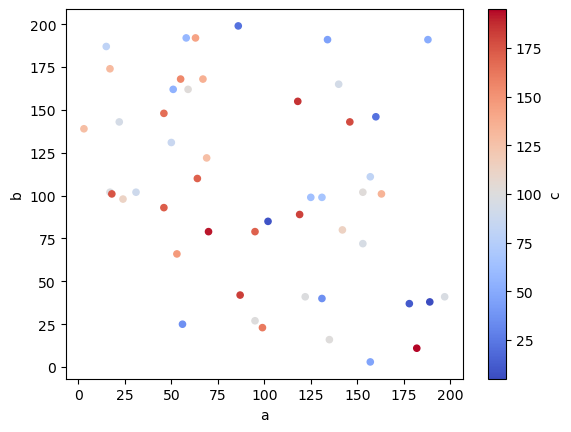

In [195]:
dfg.plot.scatter(x='a',y='b',c='c',cmap='coolwarm')

<Axes: >

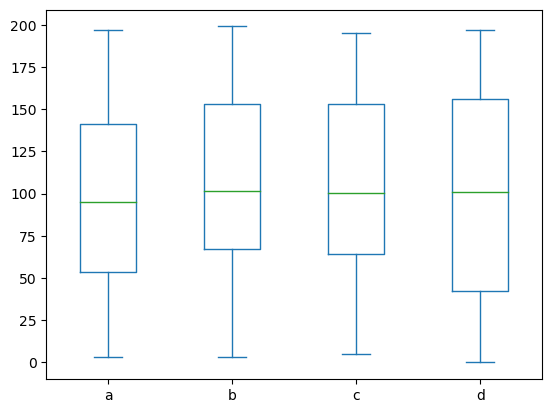

In [196]:
dfg.plot.box()

<Axes: xlabel='b', ylabel='d'>

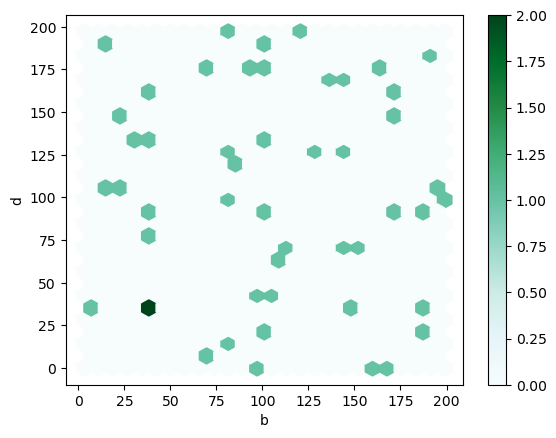

In [200]:
dfg.plot.hexbin(x='b',y='d',gridsize=25)

<Axes: ylabel='Density'>

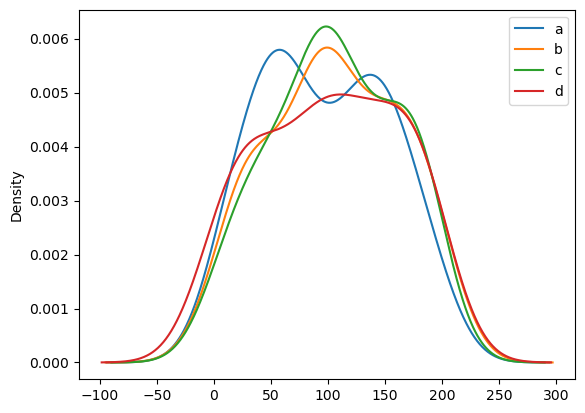

In [201]:
dfg.plot.kde()

<Axes: ylabel='Density'>

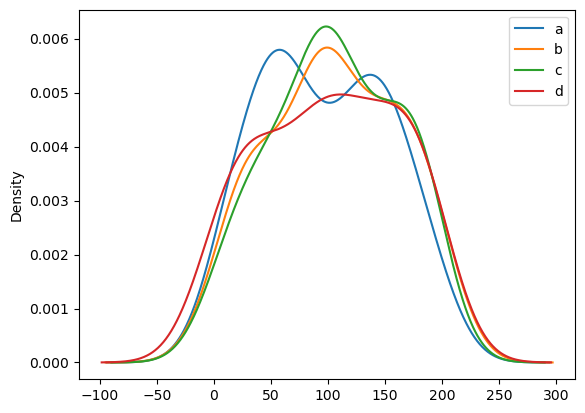

In [202]:
dfg.plot.density()